#**Simple ANN (Art. Neural Net) Example - Stock Price Prediction**

C Kaligotla

Feb 03, 2025

Note: This is time series data - Refer Class Slides for more details


### Loading Libraries

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

### Constants and Hyperparameter Inputs

In [94]:
# Constants
STOCK_SYMBOL = "AAPL"
START_DATE = '2024-03-01'
END_DATE = '2025-03-01'
LOOKBACK_PERIOD = 5
EPOCHS = 10

### Download Data and Look at Raw Data

In [95]:
# Download Stock Data
Rawdata = yf.download(STOCK_SYMBOL, start=START_DATE, end=END_DATE)
print()
print(Rawdata.shape)
Rawdata

[*********************100%***********************]  1 of 1 completed


(250, 5)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-03-01,178.815659,179.681565,176.546375,178.706175,73488000
2024-03-04,174.277115,176.068644,172.973259,175.322168,81510100
2024-03-05,169.320480,171.231455,168.822830,169.957472,95132400
2024-03-06,168.325180,170.435227,167.887245,170.256065,68587700
2024-03-07,168.205750,169.927615,167.698152,168.355038,71765100
...,...,...,...,...,...
2025-02-24,247.100006,248.860001,244.419998,244.929993,51326400
2025-02-25,247.039993,250.000000,244.910004,248.000000,48013300


### Data PreProcessing: Reshape only closing values

In [96]:
# Reshape for compatibility with scaler
data = Rawdata['Close'].values.reshape(-1, 1)
print(data[:5]) # first 5 rows
print("Data Shape:",data.shape)

[[178.81565857]
 [174.27711487]
 [169.32048035]
 [168.32518005]
 [168.20574951]]
Data Shape: (250, 1)


### Data PreProcessing: Split into train-test

In [97]:
# Split the dataset into training and test sets
train_size = int(len(data) * 0.7)
data_train = data[:train_size]
data_test = data[train_size:]

In [69]:
print("Train:", data_train.shape)
print(data_train[:5]) # first 5 rows
print("Test:", data_test.shape)
print(data_test[:5]) # first 5 rows

Train: (225, 1)
[[178.81565857]
 [174.27711487]
 [169.32048035]
 [168.32518005]
 [168.20574951]]
Test: (25, 1)
[[222.5353241 ]
 [229.60754395]
 [237.99832153]
 [239.09712219]
 [237.32905579]]


### Data PreProcessing: Scaling Data

In [98]:
# Scale Data
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler on the training data and transform both training and test data
scaler.fit(data_train)
data_train_scaled = scaler.transform(data_train)
data_test_scaled = scaler.transform(data_test)
# Printing for understanding
print("Scaled Train:", data_train_scaled.shape)
print(data_train_scaled[:5]) # first 5 rows
print("Scaled Test:", data_test_scaled.shape)
print(data_test_scaled[:5]) # first 5 rows

Scaled Train: (175, 1)
[[0.20339974]
 [0.14013255]
 [0.07103718]
 [0.05716271]
 [0.05549785]]
Scaled Test: (75, 1)
[[0.87105606]
 [0.83304168]
 [0.83304168]
 [0.84543463]
 [0.88860121]]


### Visualizing train-test on raw and scaled data

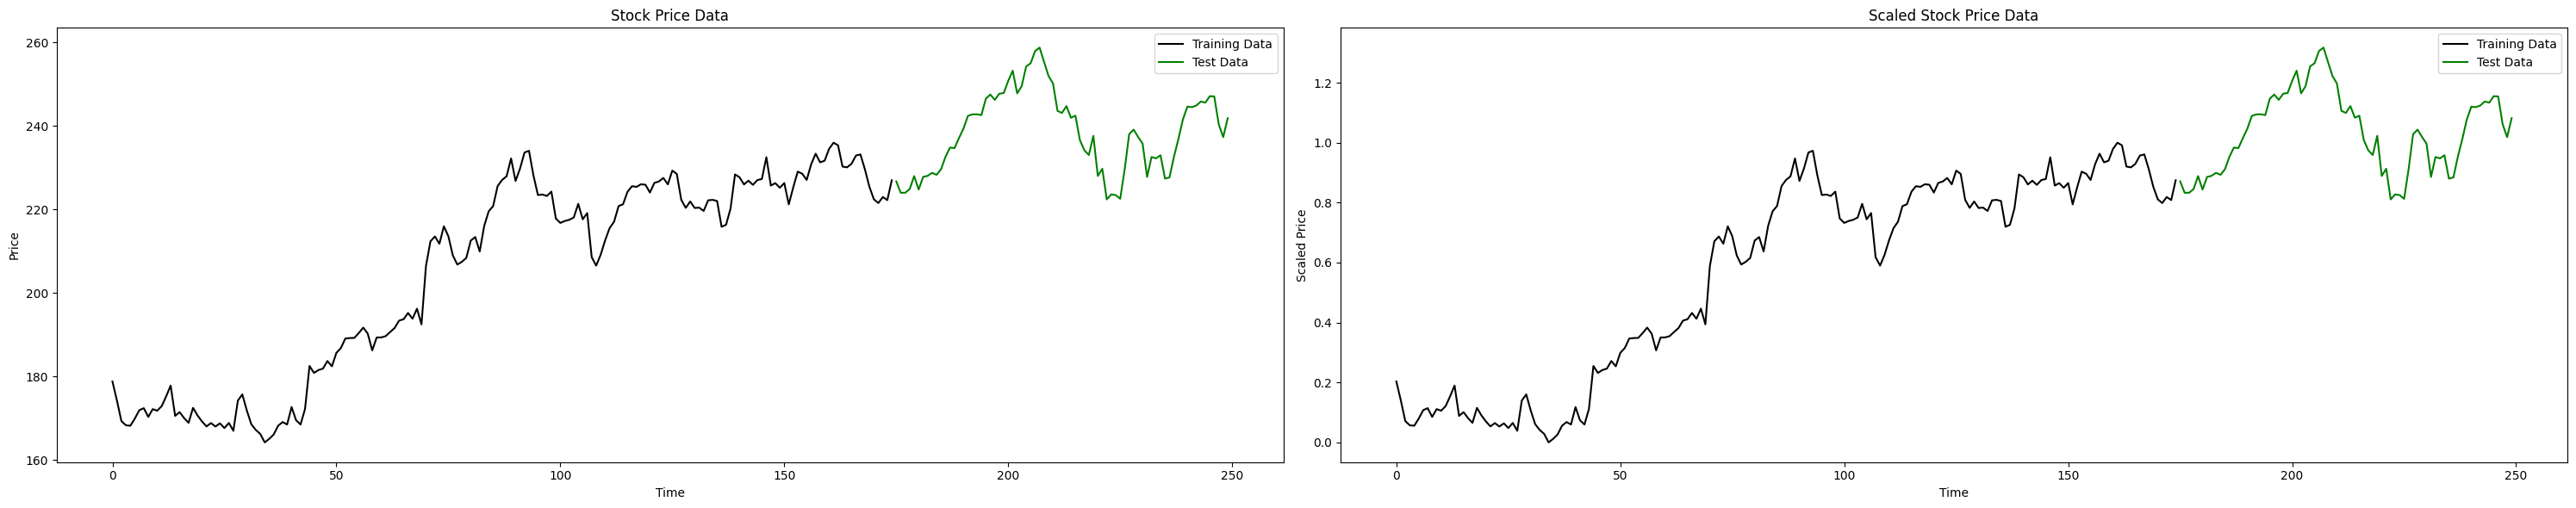

In [99]:
# Visualizing Data and Scaled Data side by side showing train-test split in time Series

# Create a figure with two subplots side by side
plt.figure(figsize=(30, 6))

# First subplot: Original Stock Price Data
plt.subplot(1, 2, 1)
plt.plot(np.arange(train_size), data_train, color="black", label="Training Data")
plt.plot(np.arange(train_size, len(data)), data_test, color="green", label="Test Data")
plt.title("Stock Price Data")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()

# Second subplot: Scaled Stock Price Data
plt.subplot(1, 2, 2)
plt.plot(np.arange(train_size), data_train_scaled, color="black", label="Training Data")
plt.plot(np.arange(train_size, len(data)), data_test_scaled, color="green", label="Test Data")
plt.title("Scaled Stock Price Data")
plt.xlabel("Time")
plt.ylabel("Scaled Price")
plt.legend()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

### Prepare Training Data per Lookback Period

In [100]:
# Prepare training and test datasets
X_train, y_train = [], []

for i in range(len(data_train_scaled) - LOOKBACK_PERIOD - 1):
  X_train.append(data_train_scaled[i:(i + LOOKBACK_PERIOD), 0])
  y_train.append(data_train_scaled[i + LOOKBACK_PERIOD, 0])
# Convert to numpy arrays after appending elements
X_train, y_train = np.array(X_train), np.array(y_train)


Comparing training data vis-a-vis scaled data

In [102]:
# X_Train on scaled data based on LOOKBACK_PERIOD
print("\n Lookback Period:",LOOKBACK_PERIOD)
print("\n X_train: \n",X_train.shape,"\n", X_train[:5]) # printing 5 rows
# y data
print("\n y_train: \n",y_train.shape,"\n", y_train[:5])# printing 5 rows


 Lookback Period: 5

 X_train: 
 (169, 5) 
 [[0.20339974 0.14013255 0.07103718 0.05716271 0.05549785]
 [0.14013255 0.07103718 0.05716271 0.05549785 0.07950079]
 [0.07103718 0.05716271 0.05549785 0.07950079 0.1075273 ]
 [0.05716271 0.05549785 0.07950079 0.1075273  0.11418674]
 [0.05549785 0.07950079 0.1075273  0.11418674 0.08505096]]

 y_train: 
 (169,) 
 [0.07950079 0.1075273  0.11418674 0.08505096 0.11099592]


### Prepare Test Data per Lookback Period

In [103]:
# Prepare test datasets
X_test, y_test = [], []

for i in range(len(data_test_scaled) - LOOKBACK_PERIOD - 1):
  X_test.append(data_test_scaled[i:(i + LOOKBACK_PERIOD), 0])
  y_test.append(data_test_scaled[i + LOOKBACK_PERIOD, 0])
# Convert to numpy arrays after appending elements
X_test, y_test = np.array(X_test), np.array(y_test)

Comparing testing dataset vis-a-vis scaled data


In [104]:
# Comparing testing dataset vis-a-vis raw data

# Scaled Data
print("Scaled Test Data \n", data_test_scaled[:5])
#data_test_scaled.reshape(1, -1)

# X_test on scaled data based on LOOKBACK_PERIOD
print("\n Lookback Period:",LOOKBACK_PERIOD)
print("\n X_test: \n",X_test.shape,"\n", X_test[:5])
# y data
print("\n y_test : \n",y_test.shape,"\n", y_test[:5])

Scaled Test Data 
 [[0.87105606]
 [0.83304168]
 [0.83304168]
 [0.84543463]
 [0.88860121]]

 Lookback Period: 5

 X_test: 
 (69, 5) 
 [[0.87105606 0.83304168 0.83304168 0.84543463 0.88860121]
 [0.83304168 0.83304168 0.84543463 0.88860121 0.84376361]
 [0.83304168 0.84543463 0.88860121 0.84376361 0.88581624]
 [0.84543463 0.88860121 0.84376361 0.88581624 0.88943652]
 [0.88860121 0.84376361 0.88581624 0.88943652 0.89946226]]

 y_test : 
 (69,) 
 [0.84376361 0.88581624 0.88943652 0.89946226 0.89277857]


### Initialize and Compile the Model

Defines a neural network model with three layers. The input layer has 64 neurons, the hidden layer has 32 neurons, and the output layer has 1 neuron. The model uses the mean squared error loss function and the Adam optimizer.

In [109]:
# Initialize and compile the model
model = Sequential()
model.add(Dense(64, input_dim=LOOKBACK_PERIOD, activation='relu'))
model.add(Dense(32, activation='relu'))
# Output layer
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

### Train / Fit the Model

In [110]:
# Train the model
model.fit(X_train, y_train, epochs=EPOCHS, batch_size=1, verbose=1)

Epoch 1/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1022
Epoch 2/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0040
Epoch 3/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0022
Epoch 4/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0025
Epoch 5/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0026
Epoch 6/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0025
Epoch 7/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0027
Epoch 8/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0032
Epoch 9/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0032
Epoch 10/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0030


### Make Predictions on Train and Test

In [111]:
train_predict = model.predict(X_train)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [112]:
test_predict = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


### Inverse transform the predictions to de-scale

In [113]:
# Inverse transform the predictions
train_predict = scaler.inverse_transform(train_predict)
y_train_original = scaler.inverse_transform(y_train.reshape(-1, 1))

test_predict = scaler.inverse_transform(test_predict)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

Visualizing Predictions

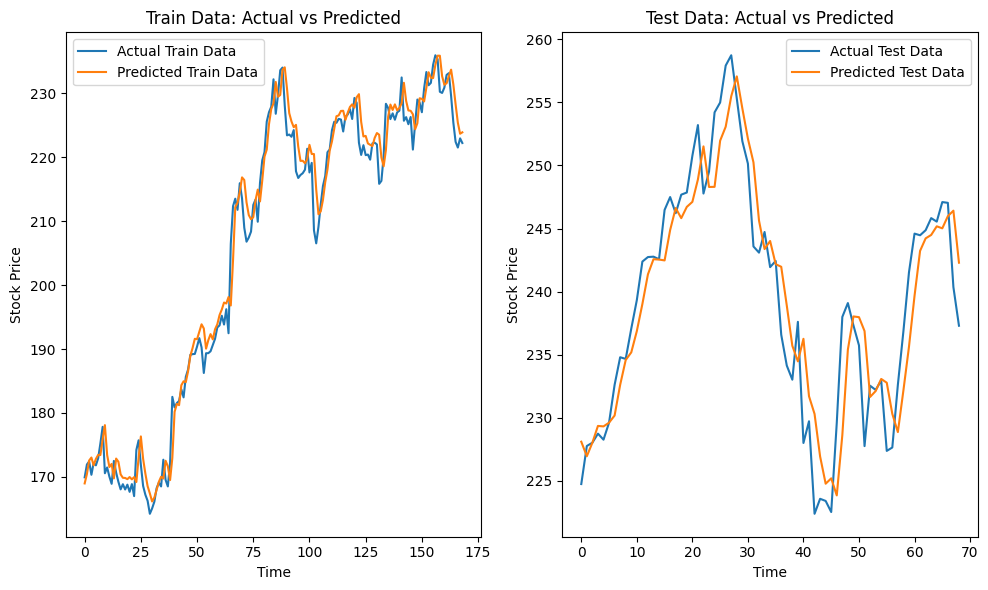

In [114]:
# Subplot train_predict and y_train_original side by side
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(y_train_original, label="Actual Train Data")
plt.plot(train_predict, label="Predicted Train Data")
plt.title("Train Data: Actual vs Predicted")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()

# Subplot test_predict and y_test_original
plt.subplot(1, 2, 2)
plt.plot(y_test_original, label="Actual Test Data")
plt.plot(test_predict, label="Predicted Test Data")
plt.title("Test Data: Actual vs Predicted")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()

plt.tight_layout()
plt.show()


### Evaluating Model Prediction Performance

In [115]:
# Calculate mean squared error
mse_train = mean_squared_error(y_train_original, train_predict)
print(f"Mean Squared Error on Train Data: {mse_train:.2f}")
mse_test = mean_squared_error(y_test_original, test_predict)
print(f"Mean Squared Error on Test Data: {mse_test:.2f}")

Mean Squared Error on Train Data: 11.40
Mean Squared Error on Test Data: 13.35


### Visualizing Output: TABULAR

In [116]:

# Calculate the difference for both train and test data
difference_train = y_train_original.ravel() - train_predict.ravel()
difference_test = y_test_original.ravel() - test_predict.ravel()

data1 = {'Date': Rawdata.index[-len(y_train_original):],
        'Actual': y_train_original.ravel(),
        'Predicted': train_predict.ravel(),
        'Difference': difference_train.ravel() }
df1 = pd.DataFrame(data1)

# Display the DataFrame
print("************")
print("Training Data")
print(df1.head())

# Create a DataFrame (only for test data)
data = {'Date': Rawdata.index[-len(y_test_original):],
        'Actual': y_test_original.ravel(),
        'Predicted': test_predict.ravel(),
        'Difference': difference_test.ravel()}
df = pd.DataFrame(data)

print("************")
print("Testing Data")
print(df.head())

************
Training Data
        Date      Actual   Predicted  Difference
0 2024-06-27  169.927628  168.974976    0.952652
1 2024-06-28  171.938141  170.439453    1.498688
2 2024-07-01  172.415863  172.567383   -0.151520
3 2024-07-02  170.325775  173.027222   -2.701447
4 2024-07-03  172.186966  171.809097    0.377869
************
Testing Data
        Date      Actual   Predicted  Difference
0 2024-11-18  224.752884  228.108017   -3.355133
1 2024-11-19  227.769577  226.957916    0.811661
2 2024-11-20  228.029282  228.033600   -0.004318
3 2024-11-21  228.748489  229.359375   -0.610886
4 2024-11-22  228.269028  229.321457   -1.052429


### Visualizing Predictions: Graphs

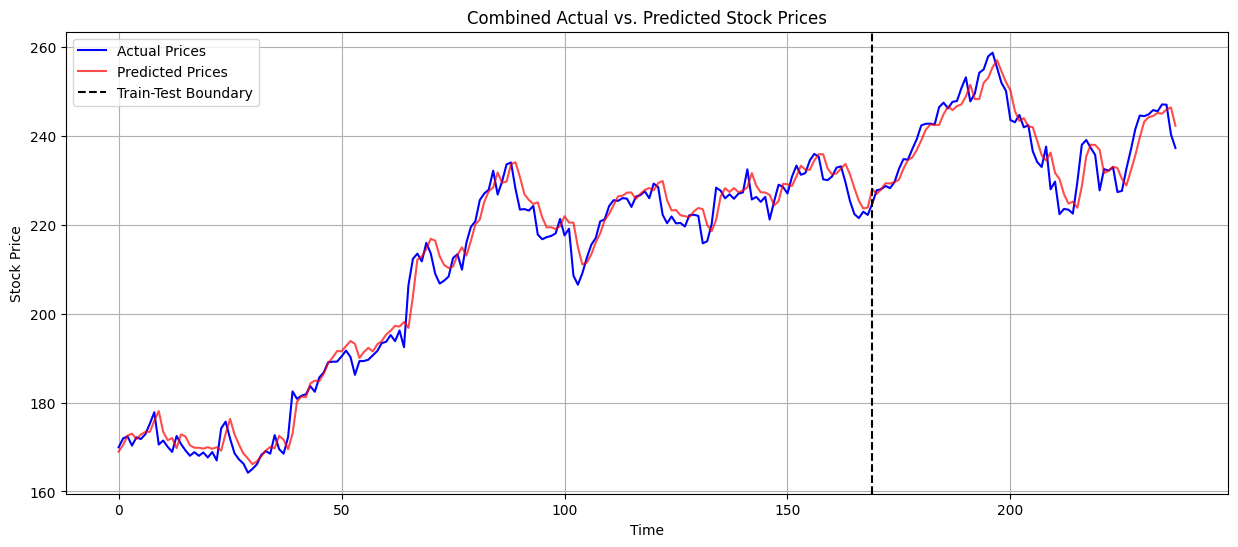

In [117]:
# Plot actual vs predicted prices
plt.figure(figsize=(15, 6))

# Combine actual price data from train and test
combined_actual = np.concatenate([y_train_original, y_test_original], axis=0)
#Combine predicted price data from train and test
combined_predicted = np.concatenate([train_predict, test_predict], axis=0)

# Plot difference between actual and predicted
difference = combined_actual.ravel() - combined_predicted.ravel()

# Plot in one Graph
plt.plot(combined_actual, label="Actual Prices", color="blue")
plt.plot(combined_predicted, label="Predicted Prices", color="red", alpha=0.7)
plt.axvline(x=len(y_train_original), color='black', linestyle='--', label='Train-Test Boundary')
plt.title("Combined Actual vs. Predicted Stock Prices")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend(loc='upper left')
plt.grid(True)

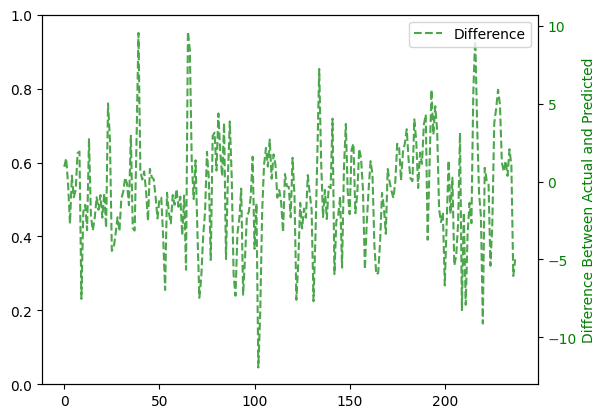

In [118]:
# Plot the difference between actual and predicted prices
ax2 = plt.gca().twinx()
ax2.plot(difference, label="Difference", color="green", linestyle='--', alpha=0.7)
ax2.set_ylabel('Difference Between Actual and Predicted', color='green')
ax2.legend(loc='upper right')
ax2.tick_params(axis='y', labelcolor='green')

plt.show()

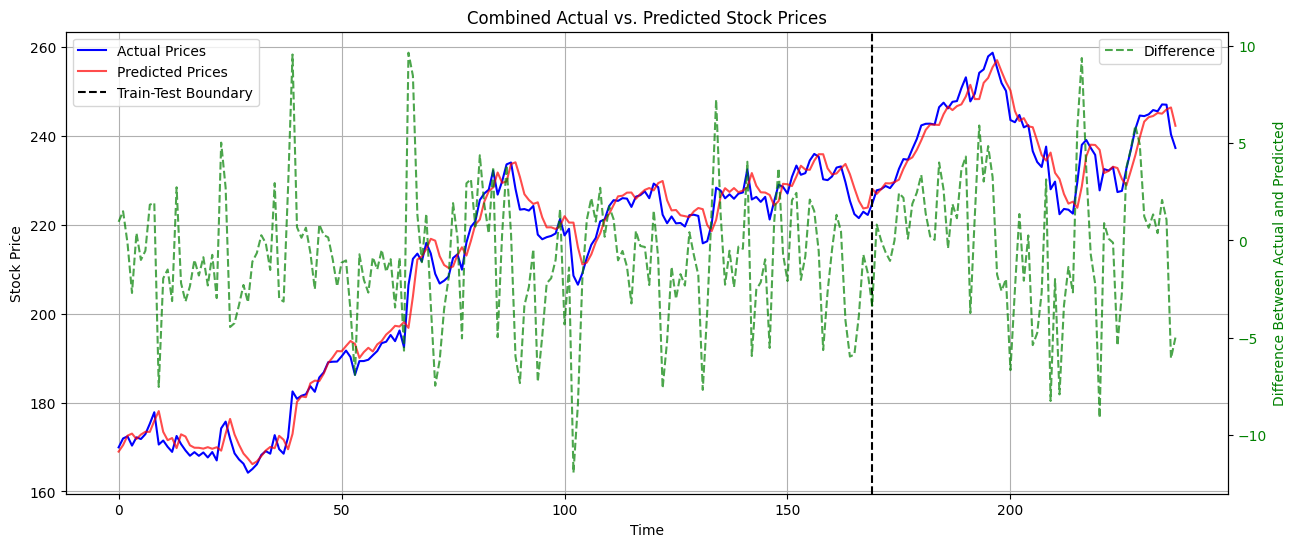

In [119]:
# Combining Graphs

# Plot actual vs predicted prices
plt.figure(figsize=(15, 6))

# Combine actual price data from train and test
combined_actual = np.concatenate([y_train_original, y_test_original], axis=0)
#Combine predicted price data from train and test
combined_predicted = np.concatenate([train_predict, test_predict], axis=0)

# Plot difference between actual and predicted
difference = combined_actual.ravel() - combined_predicted.ravel()

# Plot in one Graph
plt.plot(combined_actual, label="Actual Prices", color="blue")
plt.plot(combined_predicted, label="Predicted Prices", color="red", alpha=0.7)
plt.axvline(x=len(y_train_original), color='black', linestyle='--', label='Train-Test Boundary')
plt.title("Combined Actual vs. Predicted Stock Prices")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend(loc='upper left')
plt.grid(True)

# Plot the difference between actual and predicted prices
ax2 = plt.gca().twinx()
ax2.plot(difference, label="Difference", color="green", linestyle='--', alpha=0.7)
ax2.set_ylabel('Difference Between Actual and Predicted', color='green')
ax2.legend(loc='upper right')
ax2.tick_params(axis='y', labelcolor='green')

plt.show()

### **Optional** Combining Graphs in Plotly

In [120]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

# Assume y_train_original, y_test_original, train_predict, test_predict are already defined

# Combine actual price data from train and test
combined_actual = np.concatenate([y_train_original, y_test_original], axis=0).ravel()
# Combine predicted price data from train and test
combined_predicted = np.concatenate([train_predict, test_predict], axis=0).ravel()
# Calculate the difference between actual and predicted prices
difference = combined_actual - combined_predicted

# Create a subplot with a secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces for actual and predicted prices
fig.add_trace(
    go.Scatter(x=np.arange(len(combined_actual)), y=combined_actual, mode='lines', name='Actual Prices', line=dict(color='blue')),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=np.arange(len(combined_predicted)), y=combined_predicted, mode='lines', name='Predicted Prices', line=dict(color='red', dash='dash')),
    secondary_y=False,
)

# Add a vertical line to indicate the train-test boundary
fig.add_shape(
    dict(
        type="line",
        x0=len(y_train_original),
        y0=min(combined_actual),
        x1=len(y_train_original),
        y1=max(combined_actual),
        line=dict(color="black", width=2, dash="dash"),
    )
)

# Add a trace for the difference between actual and predicted prices
fig.add_trace(
    go.Scatter(x=np.arange(len(difference)), y=difference, mode='lines', name='Difference', line=dict(color='green', dash='dot')),
    secondary_y=True,
)

# Update layout for titles and labels
fig.update_layout(
    title="Combined Actual vs. Predicted Stock Prices",
    xaxis_title="Time",
    yaxis_title="Stock Price",
    yaxis2_title="Difference Between Actual and Predicted",
)

# Show the plot
fig.show()


# To Practice at Home
##TODO: 1. Try with another stock

##TODO: 2. Try with different time periods

##TODO: 3. Change ANN hyperparameters